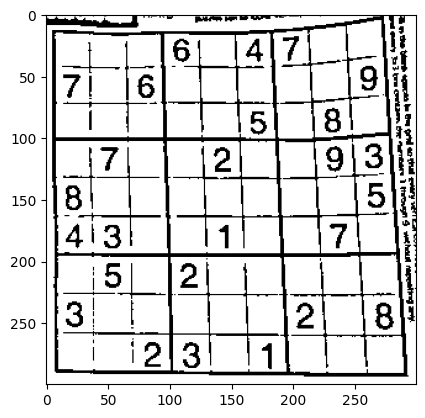

In [77]:
from bibliotekagraficzna import *
import cv2


image = cv2.imread('sudoku.jpg',cv2.IMREAD_GRAYSCALE)
th_adaptive = cv2.adaptiveThreshold(
            image,
            maxValue=255,
            adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
            thresholdType=cv2.THRESH_BINARY,
            blockSize=13,
            C=12
        )

imshow(th_adaptive, cmap='gray')


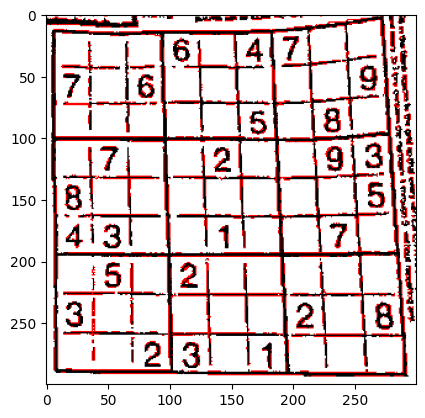

In [78]:


lines_img = th_adaptive
_, lines_thresh = cv2.threshold(
    lines_img,
    thresh=0,
    maxval=255,
    type=cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

lines_edges = cv2.Canny(lines_thresh, 20, 50, 3)

lines = cv2.HoughLinesP(
    lines_edges,
    2,
    np.pi / 180,
    30
)
result_lines_img = cv2.cvtColor(lines_img, cv2.COLOR_GRAY2RGB)
for line in lines:
  x0, y0, x1, y1 = line[0]
  cv2.line(result_lines_img, (x0, y0), (x1, y1), (255, 0, 0), 1,1)
  plt.imshow(result_lines_img)


imsave('wynik.jpg',result_lines_img, )